In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img, img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [3]:
od.download("https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp


100%|██████████| 691M/691M [03:04<00:00, 3.93MB/s] 


In [5]:
labels_all= pd.read_csv("dogbreedidfromcomp\\labels.csv")

In [6]:
labels_all.head(
    
)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
print(labels_all.shape)

(10222, 2)


In [10]:
labels_all["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [11]:
breed_all = labels_all["breed"]

In [12]:
breed_all = breed_all.value_counts()

In [13]:
breed_all

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [15]:
class_names= ["scottish_deerhound","maltese_dog","afghan_hound"]
labels = labels_all[(labels_all["breed"].isin(class_names))]
labels = labels.reset_index()
labels

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,146,0379145880ad3978f9b80f0dc2c03fba,afghan_hound
...,...,...,...
354,9927,f98392bfae7d0aa35ecc4993ee2afbaf,maltese_dog
355,9972,fa5054c5187c7171c546bd6a46b8346f,maltese_dog
356,10158,fe50bac6c389d137ea01c9cfc7346ca8,scottish_deerhound
357,10200,ff7d9c08091acc3b18b869951feeb013,maltese_dog


In [16]:
X_data = np.zeros((len(labels),224,224,3),dtype="float32")
Y_data = label_binarize(labels["breed"],classes=class_names)

In [18]:
for i in tqdm(range(len(labels))):
    img= load_img("dogbreedidfromcomp//train//%s.jpg"%labels["id"][i],target_size=[224,224])
    img= img_to_array(img)
    x = np.expand_dims(img.copy(),axis=0)
    X_data[i]=x/255.0
print(X_data.shape)
print(Y_data.shape)

100%|██████████| 359/359 [00:06<00:00, 56.03it/s]

(359, 224, 224, 3)
(359, 3)


In [19]:
model = Sequential()

model.add(Conv2D(filters = 64, 
                 kernel_size=(5,5), 
                 activation="relu",
                 input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 activation="relu",
                 kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16,
                 kernel_size=(7,7),
                 activation="relu",
                 kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8,
                 kernel_size=(5,5),
                 activation="relu",
                 kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu", kernel_regularizer="l2"))
model.add(Dense(64,activation="relu", kernel_regularizer="l2"))
model.add(Dense(len(class_names), activation="softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(0.0001), 
              metrics = ["accuracy"])

model.summary()

c:\Users\arif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
class_names

['scottish_deerhound', 'maltese_dog', 'afghan_hound']

In [21]:
X_train_val, X_test,Y_train_val,Y_test=train_test_split(X_data,Y_data,test_size=0.2)
X_train, X_val,Y_train,Y_val=train_test_split(X_train_val,Y_train_val,test_size=0.25)


In [22]:
epochs = 60
batch_size=64

history = model.fit(X_train, Y_train, 
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 501ms/step - accuracy: 0.3255 - loss: 4.9331 - val_accuracy: 0.3056 - val_loss: 4.8838
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.3294 - loss: 4.8754 - val_accuracy: 0.3056 - val_loss: 4.8482
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 421ms/step - accuracy: 0.3579 - loss: 4.8274 - val_accuracy: 0.2778 - val_loss: 4.8083
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.3482 - loss: 4.7863 - val_accuracy: 0.2778 - val_loss: 4.7661
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 0.3540 - loss: 4.7421 - val_accuracy: 0.2778 - val_loss: 4.7258
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 0.3831 - loss: 4.6959 - val_accuracy: 0.2778 - val_loss: 4.6871
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 0.3995 - loss: 4.6514 - val_accuracy: 0.2778 - val_loss: 4.6464
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.4274 - loss: 4.6064 - val_accuracy: 0.2778 - val_loss:

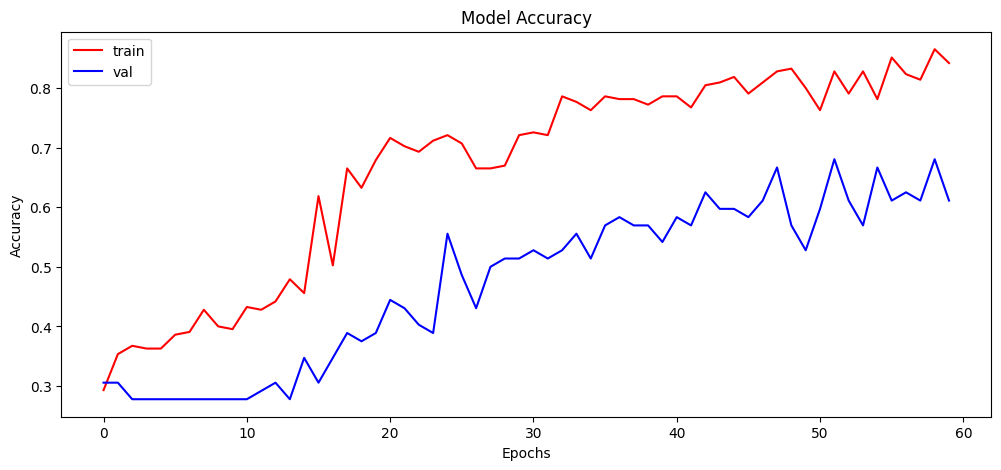

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [24]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7283 - loss: 2.9159
Accuracy over the test set: 
  72.22 %


In [25]:
model.save("dog_breed.h5")